This is my personal file for checking things i don't understand about python, numpy, etc.
It probably won't ever get uploaded to github. But now you know, just in case.

In [2]:
#having some problems with launching the right envirionment from powershell
#these are supposed to tell me what environment i'm in. (tbh i don't believe it as i had problem loading a module that wasn't in base.)
import sys
print(sys.version)
print(sys.executable)

import os
print (os.environ['CONDA_DEFAULT_ENV'])
print (os.environ['CONDA_PREFIX'])

3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
C:\Users\cas\Anaconda3\python.exe
vasc
C:\Users\cas\Anaconda3\envs\vasc


In [24]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:

deltas = np.array(np.full((4,4),np.inf))

deltas[0,1] = 103
deltas[0,2] = 1.1
deltas[1,1] = 1.23
deltas[1,2] = 123
deltas[2,2] = 2.35
deltas[2,3] = 133
deltas[3,3] = 3.4

print (deltas)

[[   inf 103.     1.1     inf]
 [   inf   1.23 123.      inf]
 [   inf    inf   2.35 133.  ]
 [   inf    inf    inf   3.4 ]]


In [9]:
bigrandom = np.random.rand(10,10)
print(bigrandom)
minimumswaps(bigrandom)

[[0.39519664 0.25284956 0.06168913 0.0658433  0.00858284 0.59352946
  0.0498056  0.06397185 0.52489275 0.26225848]
 [0.09576895 0.6865411  0.36111874 0.4842123  0.84361541 0.95245225
  0.96161651 0.29068045 0.47413521 0.09340176]
 [0.99292075 0.40868471 0.25322526 0.2514248  0.02671625 0.11536716
  0.9506318  0.11626209 0.93572856 0.70886642]
 [0.04592559 0.10333718 0.42447382 0.71571813 0.29047545 0.71166766
  0.48255387 0.54451942 0.82020926 0.58295865]
 [0.88091461 0.46808999 0.41334031 0.46628119 0.52131124 0.4407249
  0.95417921 0.32623227 0.85241685 0.06846958]
 [0.75029292 0.43416928 0.92319537 0.72049046 0.72499315 0.59705542
  0.13005855 0.72398034 0.78993112 0.69340349]
 [0.06883723 0.56361645 0.06069933 0.49820192 0.86339091 0.28691618
  0.98310643 0.84208759 0.34558355 0.89102757]
 [0.41681609 0.82051346 0.45000459 0.63825287 0.59810559 0.67869431
  0.80771814 0.08829602 0.64370539 0.44441653]
 [0.11167034 0.62767684 0.98856899 0.08781331 0.05909569 0.1740256
  0.04795408 0

NameError: name 'minimumswaps' is not defined

In [10]:
people = [0, 1]

for p1 in range(len(people)): #first person from frame f
    r1 = people[p1] #what person is this?
    whosleft = range(p1,len(people))
    for p2 in whosleft: #next person from frame f + 1
        r2 = people[p2] #what person is this?
        print(p1, p2)

0 0
0 1
1 1


In [11]:
#turn on debugging
%pdb on

Automatic pdb calling has been turned ON


Sanity checking what happens when you have a correlation in a moving window... 

In [2]:
df = pd.DataFrame(np.arange(0,1000))

df["Cs"] = np.cos(df)
df["C2"] = df["Cs"] + .1
df.loc[500:,"C2"] = 0

In [12]:
roll = df["Cs"].rolling(window=100, center=True).corr(df["C2"])

f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.loc[:,("Cs","C2")].plot(ax=ax[0])
roll.plot(ax=ax[1])

NameError: name 'df' is not defined

> <ipython-input-12-2eade70e920f>(1)<module>()
----> 1 roll = df["Cs"].rolling(window=100, center=True).corr(df["C2"])
      2 
      3 f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
      4 df.loc[:,("Cs","C2")].plot(ax=ax[0])
      5 roll.plot(ax=ax[1])



ipdb>  q


In [3]:
a = np.array([0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1])

NameError: name 'np' is not defined

In [1]:
xs = [0+3*i for i in range(3)]
ys = [1+3*i for i in range(3)]
ps = [2+3*i for i in range(3)]

In [2]:
print(a[xs])
print(a[ys])

NameError: name 'a' is not defined

In [ ]:
!dir

In [ ]:
a = 6


In [ ]:
import threading,time
a=5
threading.Thread(target=lambda:[print(a),time.sleep(20),print(a)]).start()

In [ ]:
wd =  os.getcwd() + "\\"
# locations of videos and output
videos_in = wd + "..\\videos_in\\" 
videos_out_openpose = wd + "..\\videos_out_openpose\\"

# location of openposedemo - THIS WILL BE DIFFERENT ON YOUR COMPUTER
openposepath = "C:\\Users\\cas\\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\\bin\\"

if sys.platform == "win32":
    app = "OpenPoseDemo.exe"
else:
    app = 'OpenPoseDemo.bin'

openposeapp = openposepath + app

print(openposeapp)

In [ ]:
optstring = ""
for key in params:
    optstring += " --" + key + " " + params[key]

print(optstring)

for vid in allvideos:
    try:
        print("Staring openpose processing of " + vid)
        # Log the time
        time_start = time.time()
        video = " --video " + vid
        opbin = openposeapp + video + optstring
        print(opbin)
        exitcode = os.system(opbin)
        # Log the time again
        time_end = time.time()
        if (exitcode == 0):
            # Print stats
            print ("Done " + vid)
            print ("It took %d seconds for conversion." % (time_end-time_start))
        else:
            print("OpenPose error. Exit code %d" % exitcode)
    except Exception as e:
        print("Error: ", e)
        pass

Useful Jupyter extensions

`jupyter labextension install @jupyterlab/toc`

`jupyter labextension install @lckr/jupyterlab_variableinspector`


In [5]:
def bad_function(var):
    return var + 0
 
bad_function("Mike")

TypeError: can only concatenate str (not "int") to str

In [ ]:
proc = ['lookit.01', 'lookit.02', 'lookit.03', 'lookit.04', 'lookit.05', 'lookit.06', 'lookit.07', 'lookit.08', 'lookit.09', 'lookit.10']

In [ ]:
proc['lookit.01']

In [4]:
videos = {"camera1" :{"name": "lookit.01",
  "frames": 412,
  "start": 0,
  "end": 412,
  "processed": True},
    "camera2":
    {"name": "lookit.02",
  "frames": 450,
  "start": 0,
  "end": 412,
  "processed": None}
         }
print(videos)

{'camera1': {'name': 'lookit.01', 'frames': 412, 'start': 0, 'end': 412, 'processed': True}, 'camera2': {'name': 'lookit.02', 'frames': 450, 'start': 0, 'end': 412, 'processed': None}}


In [5]:
temp = videos["camera1"]
videos["camera1"] = videos["camera2"]
videos["camera2"] = temp
print(videos)

{'camera1': {'name': 'lookit.02', 'frames': 450, 'start': 0, 'end': 412, 'processed': None}, 'camera2': {'name': 'lookit.01', 'frames': 412, 'start': 0, 'end': 412, 'processed': True}}


In [ ]:
cars = [
    {"model": "BMW 230", "mpg": 27.5},
    {"model": "Ford Edge", "mpg": 24.1}
  ]
print(cars)
len(cars)

In [ ]:

from datetime import datetime
my_date = datetime.now()
print(my_date.isoformat())

strdate = my_date.isoformat()

strdate2 = "2020-01-20T20:20:20"

In [ ]:
mydate2 = datetime.fromisoformat(strdate2)



In [ ]:
videos.json = {}

In [ ]:
proc = {}
proc["camera1"] = {}
proc["camera2"] = {}

In [ ]:
proc["camera1"]["name"] = "vid1"

In [ ]:
proc["camera2"]["openpose"] = "now"

In [ ]:
base, fmt = os.path.splitext("basename.01.avi")

print(base)
print(fmt)

In [ ]:

import ipywidgets as widgets
from IPython.display import display

widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1)

In [ ]:
widgets.IntSlider()

In [43]:
#how do we swap the data so that the smallest variance is at the bottom. it's a little tricky!
vs = {}
vs[0] = 3000
vs[2] = np.inf
vs[4] = 600
vs[3] = 200
vs[1] = 1.22

#vsperson = dict(sorted(vs.items(), key=lambda item: item[0]))
#vsorted = dict(sorted(vs.items(), key=lambda item: item[1]))
#print(vsperson)
#print(vsorted)

#sort by index
vs = dict(sorted(vs.items(), key=lambda item: item[0]))
#print(min(vs.keys()))
#print(min(vs.values()))

while len(vs) > 1:
    print(vs)
    minkey = min(vs.keys())
    minvarkey = min(vs,key=vs.get)
    if minkey == minvarkey:
        #do nothing
        print(minkey)
    else:
        #swap these sets of data around
        print("swap", minkey, minvarkey)
        vs[minvarkey] = vs[minkey]
    vs.pop(minkey)

    

{0: 3000, 1: 1.22, 2: inf, 3: 200, 4: 600}
swap 0 1
{1: 3000, 2: inf, 3: 200, 4: 600}
swap 1 3
{2: inf, 3: 3000, 4: 600}
swap 2 4
{3: 3000, 4: inf}
3


In [2]:
vs.sort()

AttributeError: 'dict' object has no attribute 'sort'

## savez_compressed woes

In [6]:
keypoints_array = np.random.randn(10,1, 20,20)
print(keypoints_array.shape)

np.savez_compressed('alldata.npz', keypoints_array=keypoints_array)

reloaded = np.load('alldata.npz')
keypoints_original = reloaded["keypoints_array"] 

print(keypoints_array.shape)


(10, 1, 20, 20)
(10, 1, 20, 20)


In [15]:
keypoints_array = np.random.randn(10,3, 3, 200,2000)
keypoints_array[:,1:3,:,:,:] = 0
print(keypoints_array.shape)

np.savez_compressed('alldata.npz', keypoints_array=keypoints_array)

reloaded = np.load('alldata.npz')
keypoints_original = reloaded["keypoints_array"] 

print(keypoints_array.shape)

#print(keypoints_array[1,:,1,:])

(10, 3, 3, 200, 2000)
(10, 3, 3, 200, 2000)


## Multivariate Gaussian Random Walk

From https://docs.pymc.io/notebooks/MvGaussianRandomWalk_demo.html


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

import pymc3 as pm
#import theano

np.random.seed(42)
%matplotlib inline

ModuleNotFoundError: No module named 'pymc3'

In [6]:
R = 3
N = 5

#create array of zeros
alldata = np.zeros([R,N])
print(alldata)

#fill in first entry
alldata[0,0] = 1
print(alldata)

#fill in column 1
alldata[:,0] = [1,1,1]
print(alldata)

alldata[0,:] = 2
print(alldata)


NameError: name 'np' is not defined

In [15]:

D = 3
N = 300
sections = 5
period = N/sections

Sigma_a = np.random.randn(D, D)
Sigma_a = Sigma_a.T.dot(Sigma_a)
L_a = cholesky(Sigma_a, lower=True)

Sigma_b = np.random.randn(D, D)
Sigma_b = Sigma_b.T.dot(Sigma_b)
L_b = cholesky(Sigma_b, lower=True)

# Gaussian Random walk:
alpha = np.cumsum(L_a.dot(np.random.randn(D, sections)), axis=1).T
beta = np.cumsum(L_b.dot(np.random.randn(D, sections)), axis=1).T
sigma = 0.1

t = np.arange(N)[:, None]/ N
alpha = np.repeat(alpha, period, axis=0)
beta = np.repeat(beta, period, axis=0)
y = alpha + beta*t + sigma*np.random.randn(N, 1)

In [16]:
print(alpha)

[[ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629 -0.22282662]
 [ 0.08814557  0.05707629

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(t, beta)
plt.title('Three Correlated Series')
plt.show()



NameError: name 'plt' is not defined

In [1]:
from IPython.display import display, clear_output
import ipywidgets as widgets
import seaborn as sns

mydata = {'a': range(3),
          'b': range(4),
          'c': range(5)}
default = 'b'
sns.boxplot(data=mydata[default])

w = widgets.Dropdown(
    options=mydata.keys(),
    value = default,
    description='List',
)
display(w)

def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(w)        
        sns.boxplot(data = mydata[change['new']])

w.observe(on_change)

ModuleNotFoundError: No module named 'seaborn'

In [2]:
%matplotlib inline

from matplotlib.pyplot import *
import ipywidgets 

button = ipywidgets.Button(description="Button")
out = ipywidgets.Output()

def on_button_clicked(b):
    with out:
        clear_output(True)
        plot([1,2],[2,1])
        show()

button.on_click(on_button_clicked)

display(button)

with out:
    plot([1,2],[1,2])
    show()

out

Button(description='Button', style=ButtonStyle())

Output()

## What's wrong with ipycanvas

In [1]:
from ipywidgets import Image

from ipycanvas import Canvas

sprite1 = Image.from_file('keypoints_pose_25.png')

canvas = Canvas(width=300, height=300)

canvas.fill_style = '#a9cafc'
canvas.fill_rect(0, 0, 300, 300)

canvas.draw_image(sprite1, 50, 50)

canvas

Canvas(height=300, width=300)

In [3]:
from ipycanvas import Canvas

x = np.linspace(-1, 1, 600)
y = np.linspace(-1, 1, 600)

x_grid, y_grid = np.meshgrid(x, y)

blue_channel = np.array(np.sin(x_grid**2 + y_grid**2) * 255, dtype=np.int32)
red_channel = np.zeros_like(blue_channel) + 200
green_channel = np.zeros_like(blue_channel) + 50

image_data = np.stack((red_channel, blue_channel, green_channel), axis=2)

canvas = Canvas(width=image_data.shape[0], height=image_data.shape[1])
canvas.put_image_data(image_data, 0, 0)

canvas

NameError: name 'np' is not defined

In [6]:
from ipywidgets import IntSlider

IntSlider()

IntSlider(value=0)

In [1]:
from ipycanvas import Canvas
canvas = Canvas(width=300, height=300)
canvas.fill_style = '#a9cafc'
canvas.fill_rect(25,25,100,100)
canvas

Canvas(height=300, width=300)

This is my personal file for checking things i don't understand about python, numpy, etc.
It probably won't ever get uploaded to github. But now you know, just in case.

10
0.006896551724137932


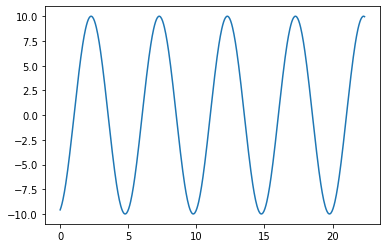

In [ ]:
GuessSMT  = 5000  #we expect infants to have a spontaneous ISI of 450 ms
GuessFreq = 1000/GuessSMT
guess_freq = GuessFreq / fps
guess_phase = 5
guess_amp = 10
guess_mean = 0

#the function that we want to fit to our data. 
#basically a sine wave where we optimize everything - especially frequency.
def optimize_func(x_data, amp, freq, phase, mean):
    return amp * np.sin((twopi * freq) * x_data + phase) + mean

data_first_guess = optimize_func(x_data, guess_amp, guess_freq, guess_phase, guess_mean)

print(guess_amp)
print(guess_freq)
plt.figure(figsize=(6, 4),)
plt.plot(x_time, data_first_guess, label = 'First guess')
plt.show()


In [ ]:
binwidth =2
targets = [400, 500, 600, 700]
sum(targets[2:2+binwidth])